# Classificação de Emoções a partir de Texto

In [1]:
# Instala a biblioteca 'datasets' do Hugging Face para carregar o dataset de emoções.
!pip install datasets -q

In [2]:
# Importando as bibliotecas essenciais
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from datasets import load_dataset
import pandas as pd
import numpy as np

# Carregando o dataset de emoções do Hugging Face
# Este dataset é muito utilizado em projetos de classificação de sentimentos e emoções.
dataset = load_dataset("emotion")

# Separando os dados de treino e teste
# O dataset já vem pré-dividido, o que facilita o processo.
caracteristicas_treino = dataset['train']['text']
classes_treino = dataset['train']['label']

caracteristicas_teste = dataset['test']['text']
classes_teste = dataset['test']['label']

# Convertendo os dados para listas para facilitar o pré-processamento
caracteristicas_treino = [str(t) for t in caracteristicas_treino]
caracteristicas_teste = [str(t) for t in caracteristicas_teste]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [3]:
# Criando o vetorizador TF-IDF
# O TfidfVectorizer converte uma coleção de documentos de texto em uma matriz de recursos TF-IDF.
# O parâmetro stop_words='english' remove palavras comuns como "the", "is", "in", etc., que não agregam valor.
vetorizador = TfidfVectorizer(stop_words='english', max_features=5000)

# 'fit_transform' no conjunto de treino: aprende o vocabulário e transforma os dados
caracteristicas_treino_vetorizadas = vetorizador.fit_transform(caracteristicas_treino)

# 'transform' no conjunto de teste: aplica o vocabulário aprendido nos dados de teste
caracteristicas_teste_vetorizadas = vetorizador.transform(caracteristicas_teste)

# Obtendo o mapeamento das classes
# O dataset original retorna labels numéricas (0, 1, 2, etc.), e aqui obtemos os nomes das emoções.
label_names = dataset['train'].features['label'].names

In [4]:
# Criar e treinar o modelo Random Forest
# Usamos o mesmo modelo do projeto das flores, mas agora com dados de texto vetorizados.
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(caracteristicas_treino_vetorizadas, classes_treino)

# Fazer previsões
previsoes = modelo.predict(caracteristicas_teste_vetorizadas)

# Avaliar o modelo
acuracia = accuracy_score(classes_teste, previsoes)
print(f'Acurácia do modelo de classificação de emoções: {acuracia:.2f}')
print('Relatório de Classificação:')
print(classification_report(classes_teste, previsoes, target_names=label_names))

Acurácia do modelo de classificação de emoções: 0.88
Relatório de Classificação:
              precision    recall  f1-score   support

     sadness       0.94      0.91      0.92       581
         joy       0.89      0.92      0.90       695
        love       0.76      0.74      0.75       159
       anger       0.89      0.89      0.89       275
        fear       0.84      0.90      0.87       224
    surprise       0.66      0.56      0.61        66

    accuracy                           0.88      2000
   macro avg       0.83      0.82      0.83      2000
weighted avg       0.88      0.88      0.88      2000



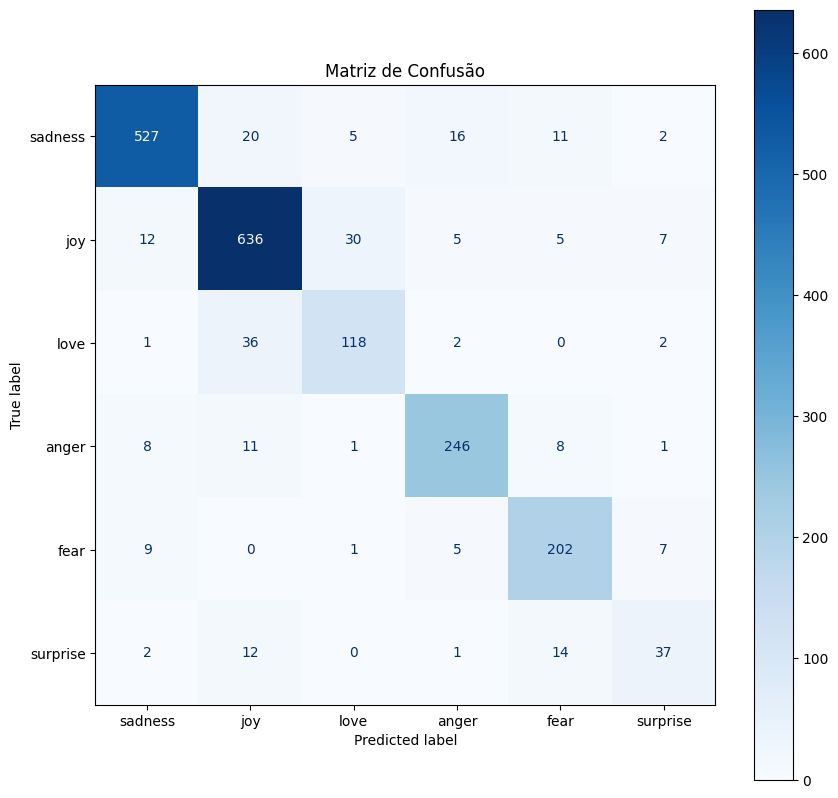

In [5]:
# Importando as bibliotecas necessárias para a matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# A matriz de confusão compara as classes reais (classes_teste) com as previsões do modelo
cm = confusion_matrix(classes_teste, previsoes)

# O ConfusionMatrixDisplay é usado para plotar a matriz de forma visual
# target_names são os nomes das classes que definimos anteriormente ('joy', 'sadness', etc.)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)

# Configurando o tamanho da figura para melhor visualização
fig, ax = plt.subplots(figsize=(10, 10))

# Plotando a matriz
disp.plot(cmap=plt.cm.Blues, values_format='.0f', ax=ax)

# Adicionando um título
plt.title('Matriz de Confusão')

# Exibindo o gráfico
plt.show()

In [7]:
import joblib

# Salvar o modelo treinado em um arquivo .pkl
joblib.dump(modelo, 'ClassifyingEmotionsText.pkl')

print('Modelo salvo com sucesso em "modelo_iris.pkl"')

Modelo salvo com sucesso em "modelo_iris.pkl"
